In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.interpolate
from os.path import basename
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../')

from utils.plot import config_matplotlib, figsize, fig_save_and_show  # noqa: E402

config_matplotlib()
latex_img_path = '/home/joaoantoniocardoso/workspace_TCC/repo/thesis/assets/generated/'

# Reading and fixing data for D51

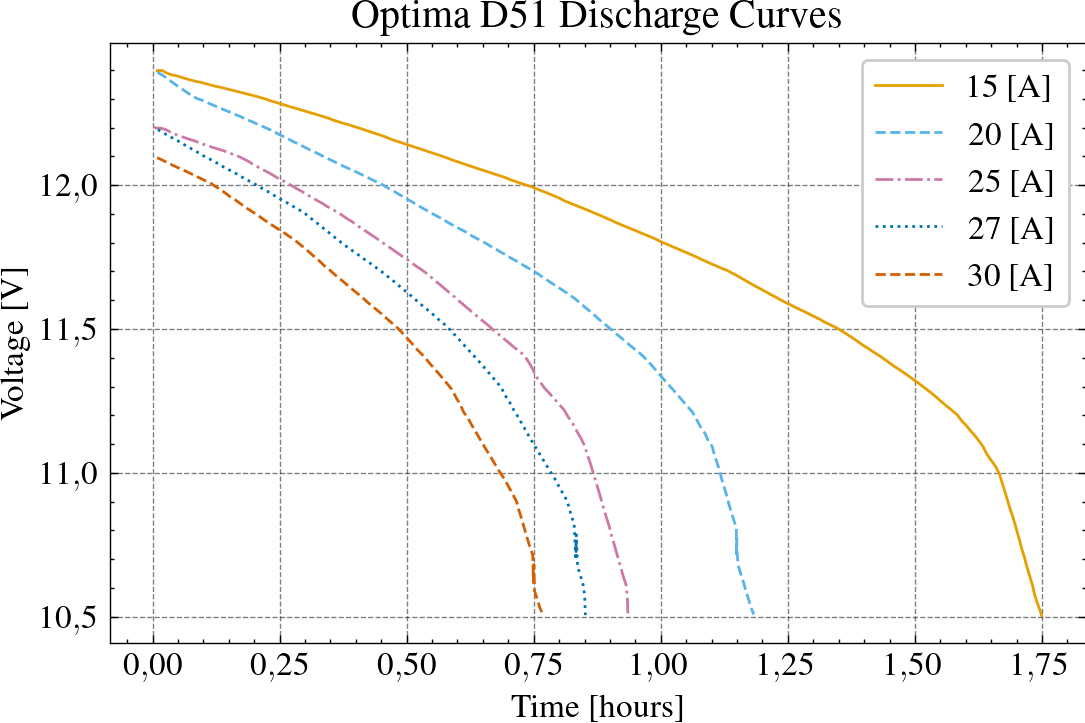

In [3]:
raw_filename = 'data/d51.csv'

df = pd.read_csv(raw_filename)
df_15A = df[['Time(15A)', 'Voltage(15A)']].dropna().rename(
    columns={'Time(15A)': 'Time', 'Voltage(15A)': 'Voltage'}
).set_index('Time').sort_values('Time')
df_15A['Current'] = 15
df_20A = df[['Time(20A)', 'Voltage(20A)']].dropna().rename(
    columns={'Time(20A)': 'Time', 'Voltage(20A)': 'Voltage'}
).set_index('Time').sort_values('Time')
df_20A['Current'] = 20
df_25A = df[['Time(25A)', 'Voltage(25A)']].dropna().rename(
    columns={'Time(25A)': 'Time', 'Voltage(25A)': 'Voltage'}
).set_index('Time').sort_values('Time')
df_25A['Current'] = 25
df_27A = df[['Time(27A)', 'Voltage(27A)']].dropna().rename(
    columns={'Time(27A)': 'Time', 'Voltage(27A)': 'Voltage'}
).set_index('Time').sort_values('Time')
df_27A['Current'] = 27
df_30A = df[['Time(30A)', 'Voltage(30A)']].dropna().rename(
    columns={'Time(30A)': 'Time', 'Voltage(30A)': 'Voltage'}
).set_index('Time').sort_values('Time')
df_30A['Current'] = 30

dataset = {
    '15A': df_15A,
    '20A': df_20A,
    '25A': df_25A,
    '27A': df_27A,
    '30A': df_30A,
}

# convert to hours
for k in dataset.keys():
    dataset[k].index /= 60

plt.figure()
plt.title('Optima D51 Discharge Curves')
plt.plot(dataset['15A'].index, dataset['15A']['Voltage'], label='15 [A]')
plt.plot(dataset['20A'].index, dataset['20A']['Voltage'], label='20 [A]')
plt.plot(dataset['25A'].index, dataset['25A']['Voltage'], label='25 [A]')
plt.plot(dataset['27A'].index, dataset['27A']['Voltage'], label='27 [A]')
plt.plot(dataset['30A'].index, dataset['30A']['Voltage'], label='30 [A]')
plt.xlabel('Time [hours]')
plt.ylabel('Voltage [V]')
plt.legend()
plt.show()

In [4]:
dataset['30A']['Voltage'].to_numpy().mean() - dataset['15A']['Voltage'].to_numpy().mean()

-0.27824062353630197

In [5]:
# Calcualte R_0
dv = dataset['30A']['Voltage'].to_numpy().mean() - dataset['15A']['Voltage'].to_numpy().mean()
di = dataset['30A']['Current'].to_numpy().mean() - dataset['15A']['Current'].to_numpy().mean()
batt_R_0 = np.abs(dv / di)

# Calculate OCV
for k in dataset.keys():
    # batt_v = batt_ocv - (batt_R_0 * batt_i)
    # batt_ocv = batt_v + (batt_R_0 * batt_i)
    dataset[k]['OCV'] = dataset[k]['Voltage'] + (batt_R_0 * dataset[k]['Current'])

dv30 = dataset['30A']['Voltage'].to_numpy().mean() - dataset['30A']['OCV'].to_numpy().mean()
dv15 = dataset['15A']['Current'].to_numpy().mean() - dataset['15A']['OCV'].to_numpy().mean()
print(dv30, dv15)

-0.5564812470726057 2.960152340923342


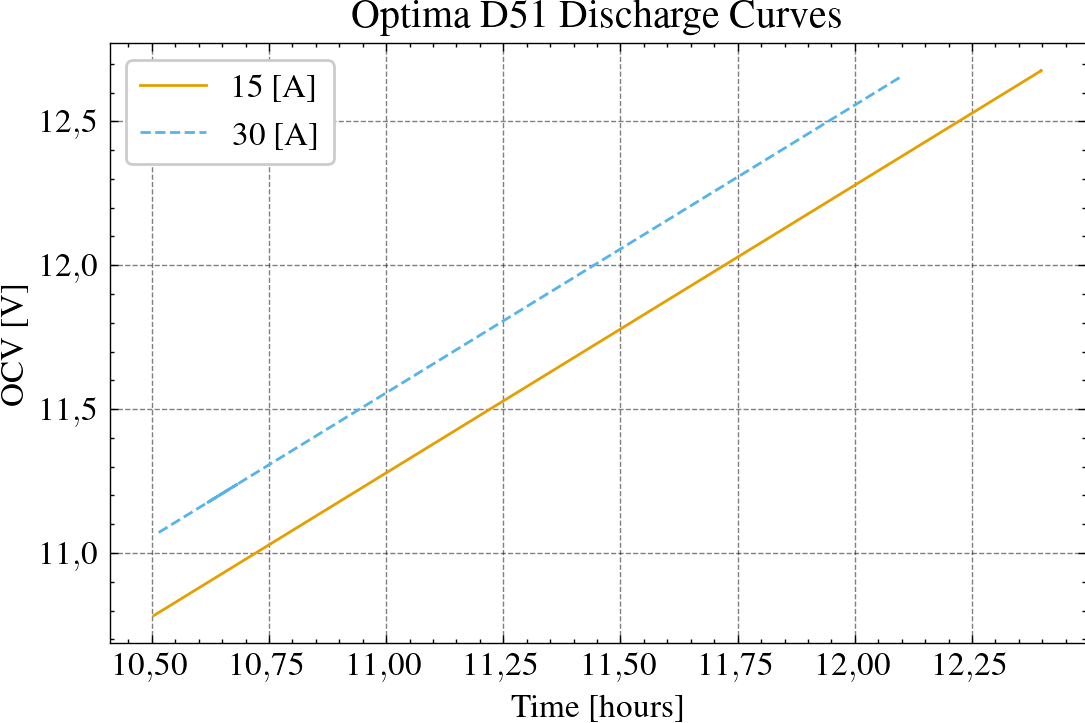

In [6]:

plt.figure()
plt.title('Optima D51 Discharge Curves')
plt.plot(dataset['15A']['Voltage'], dataset['15A']['OCV'], label='15 [A]')
plt.plot(dataset['30A']['Voltage'], dataset['30A']['OCV'], label='30 [A]')
plt.xlabel('Time [hours]')
plt.ylabel('OCV [V]')
plt.legend()
plt.show()